Inspecting the contents of the .npz file

In [ ]:
import numpy as np

# Load the .npz file
data = np.load("/content/test_predictions_full_300.npz")

# List all arrays stored in the .npz file
print("Keys in the .npz file:", data.files)
# Extract and process time values
time_key = "times"  # Make sure this key exists
if time_key in data:
    time_values = np.array(data[time_key])  # Convert to NumPy array if needed

    # Find max and min time values
    max_time = np.max(time_values)
    min_time = np.min(time_values)

    print(f"Max Time: {max_time}")
    print(f"Min Time: {min_time}")
else:
    print(f"Key '{time_key}' not found in the dataset.")

Keys in the .npz file: ['true', 'predicted', 'times', 'vehicle_ids']
Max Time: 4081.0
Min Time: 99.0


In [ ]:
import numpy as np

def print_vehicle_ids_info():
    data = np.load("test_predictions_full_300.npz")


    # Print overall data file information
    print("Data file contents:")
    for key in data.files:
        print(f"Array Name: {key}")
        print(f"Shape: {data[key].shape}")
        print(f"Data Type: {data[key].dtype}")
        print(f"First few elements: {data[key]}")
        print()

    # Get vehicle IDs
    vehicle_ids = data["vehicle_ids"]

    # Count unique vehicle IDs
    unique_ids = np.unique(vehicle_ids)
    print(f"Total rows in data: {len(vehicle_ids)}")
    print(f"Number of unique vehicle IDs: {len(unique_ids)}")

    # Print frequency of each vehicle ID
    print("\nVehicle ID frequencies:")
    unique_counts = {}
    for id in vehicle_ids:
        if id in unique_counts:
            unique_counts[id] += 1
        else:
            unique_counts[id] = 1

    # Print first 10 vehicle IDs and their frequencies
    for i, (vid, count) in enumerate(unique_counts.items()):
        print(f"Vehicle ID {vid}: appears {count} times")
        if i >= 9:  # Print only first 10
            remaining = len(unique_counts) - 10
            print(f"... and {remaining} more vehicle IDs")
            break

    # Print example of one vehicle's multiple entries
    if len(unique_ids) > 0:
        sample_id = unique_ids[0]
        print(f"\nExample: Entries for vehicle ID {sample_id}:")
        indices = np.where(vehicle_ids == sample_id)[0]
        for i, idx in enumerate(indices):  # Show first 5 positions for this vehicle
            print(f"Position {i+1}: {data['predicted'][idx]}")
            print(f"Time: {data['times'][idx]}")

        if len(indices) > 5:
            print(f"... and {len(indices)-5} more positions")

if __name__ == "__main__":
    print_vehicle_ids_info()

Data file contents:
Array Name: true
Shape: (7749, 4)
Data Type: float64
First few elements: [[0.33987706 0.32164875 0.62537523 0.36172222]
 [0.36651336 0.29936155 0.71723034 0.38916667]
 [0.67414753 0.28413575 0.79347609 0.52175   ]
 ...
 [0.78090765 0.24385047 0.66619972 0.34325   ]
 [0.31691248 0.35017705 0.65099059 0.32830556]
 [0.22130184 0.49190074 0.38343006 0.4595    ]]

Array Name: predicted
Shape: (7749, 4)
Data Type: float32
First few elements: [[0.34083343 0.3204603  0.6288214  0.35854965]
 [0.36779606 0.3010285  0.7236053  0.38662297]
 [0.67191696 0.2848128  0.77416193 0.5185673 ]
 ...
 [0.7837848  0.24354845 0.6516647  0.3376571 ]
 [0.31812245 0.34774077 0.6830598  0.3240996 ]
 [0.21209985 0.48948732 0.3804854  0.45059562]]

Array Name: times
Shape: (7749, 10)
Data Type: float64
First few elements: [[ 357.  358.  359. ...  364.  365.  366.]
 [3426. 3427. 3428. ... 3433. 3434. 3435.]
 [2728. 2729. 2730. ... 2735. 2736. 2737.]
 ...
 [2488. 2489. 2490. ... 2495. 2496. 2497.]

**Setting the environment (positions of RSUs)**


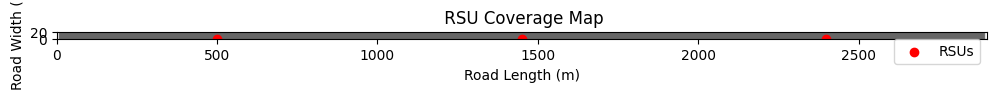

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Road Parameters
road_length = 2900  # meters
road_width = 22  # meters

# RSU Parameters
rsu_coverage_radius = 500  # meters
rsu_overlap = 50  # meters

# Optimized RSU positions to maximize coverage
rsu_positions = [
    (500,0 ), (1450, 0), (2400, 0),  # RSUs on first road

]

# Generate a grid to visualize coverage
x_vals = np.linspace(0, road_length, 500)  # Fine granularity grid
y_vals = np.linspace(0, road_width, 100)
X, Y = np.meshgrid(x_vals, y_vals)
covered = np.zeros_like(X, dtype=bool)  # Initialize as False (not covered)

# Compute coverage
for rsu_x, rsu_y in rsu_positions:
    distance = np.sqrt((X - rsu_x)**2 + (Y - rsu_y)**2)
    covered |= (distance <= rsu_coverage_radius)

# Plot the road and RSU coverage
plt.figure(figsize=(12, 5))
plt.imshow(covered, extent=[0, road_length, 0, road_width], origin="lower", cmap="Greys", alpha=0.6)
# plt.colorbar(label="Coverage (1 = Covered, 0 = Not Covered)")
plt.scatter(*zip(*rsu_positions), c="red", marker="o", label="RSUs")  # Plot RSUs
plt.xlabel("Road Length (m)")
plt.ylabel("Road Width (m)")
plt.title(" RSU Coverage Map")
plt.legend()
plt.show()


Simulation Parameters


In [ ]:
import numpy as np
# Simulation parameters
no_of_vehicles=20
W_n = 10e6  # Bandwidth of the transmission (10 MHz)
P_u = 0.1  # Transmission power of TV_n (0.1 W)
h_n = np.random.uniform(10**-8, 10**-7)  # Channel gain (randomized within range)
N_0 = 10**(-7.4)  # Noise power density (-74 dBm/Hz converted to Watts)
D_n = np.random.uniform(0.3e6, 1.0e6)  # Data size of P_n (MB to bits)
C_n = np.random.uniform(0.5, 1.2) * 1e9  # CPU cycles of P_n (Gcycles to cycles)
f_n = 0.3 * 1e9  # Computational capability of TV_n (cycles/s)
f_rsu = np.random.uniform(1.6, 2.4) * 1e9
rho_l, rho_r = 1, 0  # Local execution decision
I_n=0


# Distance of vehicle to RSU (random distance in meters)
d_n = np.random.uniform(10, 200)
#to be replaced by values from the LSTM model

#this is just to check the formulae



#β (Path Loss Exponent)
beta = 1

#beta works for 2, but for 4 its giving rn =0

import numpy as np

def compute_data_transmission_rate(W_n, P_u, d_n, beta, h_n, N_0, I_n):
    return W_n * np.log2(1 + ((P_u * d_n**(-beta) * h_n) / (N_0 + I_n)))

def compute_transmission_delay(D_n, r_n):
    return D_n / r_n

def compute_downlink_delay(D_n, C_n, r_n):
    ratio_lambda = D_n / C_n
    return (ratio_lambda * D_n) / r_n

def compute_communication_latency(t_n_up, t_n_down):
    return t_n_up + t_n_down

def compute_local_computation_delay(C_n, f_n):
    return C_n / f_n

def compute_rsu_computation_delay(C_n, f_rsu):
    f_rsu_allocated = np.random.uniform(0.5, 1.0) * f_rsu
    return C_n / f_rsu_allocated

def make_offloading_decision():
    ρ_l = 1

    ρ_r = 1 - ρ_l
    return ρ_l, ρ_r

def compute_total_computation_delay(ρ_l, ρ_r, t_n_comloc, t_n_comRSU):
    return ρ_l * t_n_comloc + ρ_r * t_n_comRSU

r_n = compute_data_transmission_rate(W_n, P_u, d_n, beta, h_n, N_0, I_n)
t_n_up = compute_transmission_delay(D_n, r_n)
t_n_down = compute_downlink_delay(D_n, C_n, r_n)
t_n_link = compute_communication_latency(t_n_up, t_n_down)
t_n_comloc = compute_local_computation_delay(C_n, f_n)
t_n_comRSU = compute_rsu_computation_delay(C_n, f_rsu)
ρ_l, ρ_r = make_offloading_decision()
t_n_com = compute_total_computation_delay(ρ_l, ρ_r, t_n_comloc, t_n_comRSU)



def transmission_latency(P_u, d_n, beta, h_n, N_0, I_n, W_n, D_n):
  # this formula
    r_n = W_n * np.log2(1 + (P_u * d_n**-beta * h_n**2) / (N_0 + I_n))  # Eq. (4)
    return D_n / r_n  # Eq. (3)

def local_computation_latency(C_n, f_n):

    return C_n / f_n  # Eq. (7)

def rsu_computation_latency(C_n, f_rsu_prime):

    return C_n / f_rsu_prime  # Eq. (8)

def total_computation_latency(t_comloc, t_comRSU, rho_l, rho_r):

    return rho_l * t_comloc + rho_r * t_comRSU  # Eq. (9)



# Compute latencies
t_up = transmission_latency(P_u, d_n, beta, h_n, N_0, I_n, W_n, D_n)
t_comloc = local_computation_latency(C_n, f_n)
t_comRSU = rsu_computation_latency(C_n, f_rsu)
t_com = total_computation_latency(t_comloc, t_comRSU, rho_l, rho_r)






In [ ]:
# Print the results
print(f"Data Transmission Rate (r_n): {r_n:.2f} bps")
print(f"Transmission Delay (t_n^up): {t_n_up:.6f} s")
print(f"Return Delay (t_n^down): {t_n_down:.6f} s")
print(f"Communication Latency (t_n^link): {t_n_link:.6f} s")
print(f"Local Computation Delay (t_n^comloc): {t_n_comloc:.6f} s")
print(f"RSU Computation Delay (t_n^comRSU): {t_n_comRSU:.6f} s")
print(f"Final Computation Latency (t_n^com): {t_n_com:.6f} s (\u03c1_l={ρ_l}, \u03c1_r={ρ_r})")
print(f"Transmission Latency (t^up_n): {t_up:.6f} sec")
print(f"Local Computation Latency (t^comloc_n): {t_comloc:.6f} sec")
print(f"RSU Computation Latency (t^comRSU_n): {t_comRSU:.6f} sec")
print(f"Total Computation Latency (t^com_n): {t_com:.6f} sec")

Data Transmission Rate (r_n): 18611.71 bps
Transmission Delay (t_n^up): 53.134665 s
Return Delay (t_n^down): 0.053717 s
Communication Latency (t_n^link): 53.188382 s
Local Computation Delay (t_n^comloc): 3.260694 s
RSU Computation Delay (t_n^comRSU): 0.547980 s
Final Computation Latency (t_n^com): 3.260694 s (ρ_l=1, ρ_r=0)
Transmission Latency (t^up_n): 735352523.869979 sec
Local Computation Latency (t^comloc_n): 3.260694 sec
RSU Computation Latency (t^comRSU_n): 0.516373 sec
Total Computation Latency (t^com_n): 3.260694 sec


DQN MODEL


only 2 rsus

(too many errors- due to wrong parameters)


Streaming output truncated to the last 5000 lines.
Episode 1001, Total Reward: 6414.07, Epsilon: 0.010
Episode 1002, Total Reward: 6992.95, Epsilon: 0.010
Episode 1003, Total Reward: 6964.14, Epsilon: 0.010
Episode 1004, Total Reward: 7016.81, Epsilon: 0.010
Episode 1005, Total Reward: 6970.02, Epsilon: 0.010
Episode 1006, Total Reward: 6989.14, Epsilon: 0.010
Episode 1007, Total Reward: 6945.37, Epsilon: 0.010
Episode 1008, Total Reward: 6495.09, Epsilon: 0.010
Episode 1009, Total Reward: 6985.50, Epsilon: 0.010
Episode 1010, Total Reward: 7024.47, Epsilon: 0.010
Episode 1011, Total Reward: 6975.63, Epsilon: 0.010
Episode 1012, Total Reward: 6970.14, Epsilon: 0.010
Episode 1013, Total Reward: 6986.46, Epsilon: 0.010
Episode 1014, Total Reward: 6975.11, Epsilon: 0.010
Episode 1015, Total Reward: 7003.48, Epsilon: 0.010
Episode 1016, Total Reward: 6974.33, Epsilon: 0.010
Episode 1017, Total Reward: 6972.10, Epsilon: 0.010
Episode 1018, Total Reward: 6949.40, Epsilon: 0.010
Episode 1019,

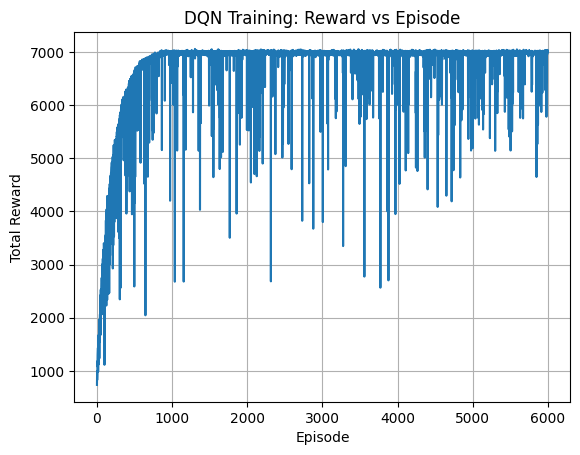

In [ ]:
# Final Deep Q-Network implementation for Vehicular Edge Computing
# with multi-vehicle offloading decisions using predicted trajectories.

import random
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

# ----------- Constants -----------
m = 10**6
k = 10**3
g = 10**9
W = 10 * m  # 10 MHz
P_u = 0.1   # 0.1W
sigma2 = 10**(-17.4)  # noise power density in W/Hz
I = 1e-10  # interference

# ----------- RSU and Vehicle Models -----------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)  # Gcycles/s
        self.resource_capacity = 100

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g  # 0.3 Gcycles/s

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

# ----------- Replay Memory -----------
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.idx = 0

    def store(self, state, action, next_state, reward, done):
        data = (state, action, next_state, reward, done)
        if len(self.buffer) < self.capacity:
            self.buffer.append(data)
        else:
            self.buffer[self.idx] = data
        self.idx = (self.idx + 1) % self.capacity

    def sample(self, batch_size, device):
        batch = random.sample(self.buffer, batch_size)
        states, actions, next_states, rewards, dones = zip(*batch)
        return (
            torch.tensor(states, dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.int64).to(device),
            torch.tensor(next_states, dtype=torch.float32).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.bool).to(device)
        )

    def __len__(self):
        return len(self.buffer)

# ----------- DQN Network -----------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# ----------- DQN Agent -----------
class DQNAgent:
    def __init__(self, state_size, action_size, device):
        self.device = device
        self.epsilon = 0.9
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.discount = 0.99
        self.memory = ReplayMemory(10000)
        self.policy_net = DQNNet(state_size, action_size).to(device)
        self.target_net = DQNNet(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.0008)

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, 1)
        state_tensor = torch.tensor([state], dtype=torch.float32).to(self.device)
        with torch.no_grad():
            return torch.argmax(self.policy_net(state_tensor)).item()

    def learn(self, batch_size):
        if len(self.memory) < batch_size:
            return
        states, actions, next_states, rewards, dones = self.memory.sample(batch_size, self.device)
        q_values = self.policy_net(states).gather(1, actions.view(-1, 1))
        max_next_q = self.target_net(next_states).max(1).values
        targets = rewards + self.discount * max_next_q * (~dones)
        loss = F.mse_loss(q_values.view(-1), targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# ----------- Environment Class -----------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450,0), (2400, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

    def rsu_return_delay(self, d_n):
        rate = W * math.log2(1 + (P_u * 1e-7) / (sigma2 + I))
        return d_n / rate

    def step(self, actions):
        rewards = []
        rsu_remaining = self.rsu.resource_capacity
        for i, vid in enumerate(self.vehicle_ids):
            cpu_cycles = random.uniform(0.5, 1.2) * g
            data_size = random.uniform(0.3, 1.0) * m
            task_deadline = 1.2
            x, y, _, _ = self.trajectories[vid][self.current_step]

            if actions[i] == 0:
                delay = self.vehicles[vid].compDelay(cpu_cycles)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 0
            else:
                comp = self.rsu.compDelay(cpu_cycles)
                t_ret = self.rsu_return_delay(data_size)
                delay = comp + t_ret
                stable = any(math.hypot(x - rx, y - ry) <= self.rsu.radius for rx, ry in self.rsu_positions)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 5 if stable else -5
                rsu_remaining -= 1
                self.Salloc[i] = 1

            delay_ratio = delay / max(0.0001, task_deadline)
            rtime = 5 * (1 - min(1, delay_ratio))
            reward = 0.4 * rsuc + 0.4 * rtime + 0.2 * roffsuc
            rewards.append(reward)
            self.Soff[i] = actions[i]
            self.Ssche[i] = 1 if delay <= task_deadline else 0

        self.Srest = [max(0, rsu_remaining)]
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self.Soff + self.Ssche + self.Salloc + self.Srest
        return next_state, sum(rewards), done



# ----------- Setup and Training Script -----------
if __name__ == '__main__':
    data = np.load("test_predictions_full_300.npz")
    predicted = data['predicted']
    vehicle_ids = data['vehicle_ids']

    df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1,1), predicted]),
                      columns=["vehicle_id", "lat", "lon", "vx", "vy"])
    top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
    trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

    vehicles = {vid: Vehicle() for vid in top_15_ids}
    rsu = RSU()
    env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

    state_size = len(env.reset())
    action_size = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    agent = DQNAgent(state_size, action_size, device)

    episodes = 6000
    reward_log = []
    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            actions = [agent.select_action(state) for _ in range(len(top_15_ids))]
            next_state, reward, done = env.step(actions)
            agent.memory.store(state, actions[0], next_state, reward, done)
            agent.learn(32)
            state = next_state
            total_reward += reward
        agent.update_epsilon()
        agent.update_target_net()
        reward_log.append(total_reward)
        print(f"Episode {ep+1}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.3f}")

    torch.save(agent.policy_net.state_dict(), "dqn_multi_vehicle.pth")

    plt.plot(range(1, episodes + 1), reward_log)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("DQN Training: Reward vs Episode")
    plt.grid(True)
    plt.savefig("reward_vs_episode.png")
    plt.show()


DQN + KM Matching

(not the right graph)
(incorrect model)

Streaming output truncated to the last 5000 lines.
Episode 1001, Total Reward: 5896.90, Epsilon: 0.010
Episode 1002, Total Reward: 5909.35, Epsilon: 0.010
Episode 1003, Total Reward: 5884.03, Epsilon: 0.010
Episode 1004, Total Reward: 5902.10, Epsilon: 0.010
Episode 1005, Total Reward: 5894.03, Epsilon: 0.010
Episode 1006, Total Reward: 5897.35, Epsilon: 0.010
Episode 1007, Total Reward: 5893.61, Epsilon: 0.010
Episode 1008, Total Reward: 5902.36, Epsilon: 0.010
Episode 1009, Total Reward: 5887.68, Epsilon: 0.010
Episode 1010, Total Reward: 5888.06, Epsilon: 0.010
Episode 1011, Total Reward: 5897.71, Epsilon: 0.010
Episode 1012, Total Reward: 5900.65, Epsilon: 0.010
Episode 1013, Total Reward: 5896.74, Epsilon: 0.010
Episode 1014, Total Reward: 5888.40, Epsilon: 0.010
Episode 1015, Total Reward: 5894.33, Epsilon: 0.010
Episode 1016, Total Reward: 5895.20, Epsilon: 0.010
Episode 1017, Total Reward: 5895.04, Epsilon: 0.010
Episode 1018, Total Reward: 5904.41, Epsilon: 0.010
Episode 1019,

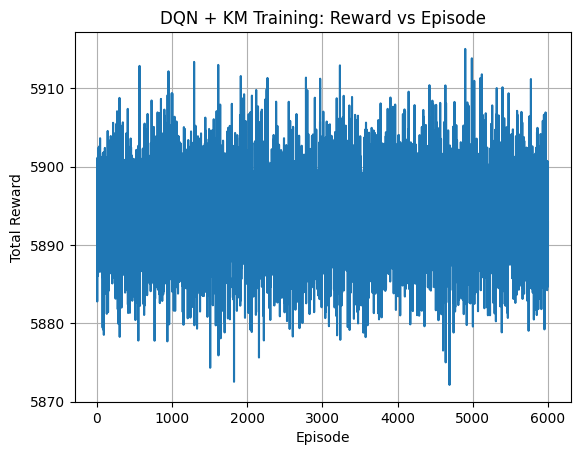

In [ ]:
# Final Deep Q-Network + KM Matching for Vehicular Edge Computing

import random
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

# Constants
m = 10**6
k = 10**3
g = 10**9
W = 10 * m
P_u = 0.1
sigma2 = 10**(-17.4)
I = 1e-10

# RSU and Vehicle Models
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

# Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.idx = 0

    def store(self, state, action, next_state, reward, done):
        data = (state, action, next_state, reward, done)
        if len(self.buffer) < self.capacity:
            self.buffer.append(data)
        else:
            self.buffer[self.idx] = data
        self.idx = (self.idx + 1) % self.capacity

    def sample(self, batch_size, device):
        batch = random.sample(self.buffer, batch_size)
        states, actions, next_states, rewards, dones = zip(*batch)
        return (
            torch.tensor(states, dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.int64).to(device),
            torch.tensor(next_states, dtype=torch.float32).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.bool).to(device)
        )

    def __len__(self):
        return len(self.buffer)

# DQN Network
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size, device):
        self.device = device
        self.epsilon = 0.9
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.discount = 0.99
        self.memory = ReplayMemory(10000)
        self.policy_net = DQNNet(state_size, action_size).to(device)
        self.target_net = DQNNet(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.0008)

    def learn(self, batch_size):
        if len(self.memory) < batch_size:
            return
        states, actions, next_states, rewards, dones = self.memory.sample(batch_size, self.device)
        q_values = self.policy_net(states).gather(1, actions.view(-1, 1))
        max_next_q = self.target_net(next_states).max(1).values
        targets = rewards + self.discount * max_next_q * (~dones)
        loss = F.mse_loss(q_values.view(-1), targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# Environment
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0), (2400, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

    def rsu_return_delay(self, d_n):
        rate = W * math.log2(1 + (P_u * 1e-7) / (sigma2 + I))
        return d_n / rate

    def step(self, actions):
        rewards = []
        rsu_remaining = self.rsu.resource_capacity

        for i, vid in enumerate(self.vehicle_ids):
            cpu_cycles = random.uniform(0.5, 1.2) * g
            data_size = random.uniform(0.3, 1.0) * m
            task_deadline = 1.2
            x, y, _, _ = self.trajectories[vid][self.current_step]

            action = actions[i]
            if action == 0:
                delay = self.vehicles[vid].compDelay(cpu_cycles)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 0
            else:
                comp = self.rsu.compDelay(cpu_cycles)
                t_ret = self.rsu_return_delay(data_size)
                delay = comp + t_ret
                stable = any(math.hypot(x - rx, y - ry) <= self.rsu.radius for rx, ry in self.rsu_positions)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 5 if stable else -5
                rsu_remaining -= 1
                self.Salloc[i] = 1

            delay_ratio = delay / max(0.0001, task_deadline)
            rtime = 5 * (1 - min(1, delay_ratio))
            reward = 0.4 * rsuc + 0.4 * rtime + 0.2 * roffsuc
            rewards.append(reward)

            self.Soff[i] = action
            self.Ssche[i] = 1 if delay <= task_deadline else 0

        self.Srest = [max(0, rsu_remaining)]
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self.Soff + self.Ssche + self.Salloc + self.Srest
        return next_state, rewards, done

# KM Matching-based action selection

def get_q_matrix(agent, state, vehicle_ids):
    q_matrix = []
    s = torch.tensor([state], dtype=torch.float32).to(agent.device)
    with torch.no_grad():
        q_values = agent.policy_net(s).cpu().numpy().flatten()
    for _ in vehicle_ids:
        q_matrix.append(q_values)
    return np.array(q_matrix)

def km_match(q_matrix):
    cost_matrix = -q_matrix  # maximize Q-values
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    return [col_ind[i % len(col_ind)] for i in range(q_matrix.shape[0])]

# Main Training
if __name__ == '__main__':
    data = np.load("test_predictions_full_300.npz")
    predicted = data['predicted']
    vehicle_ids = data['vehicle_ids']

    df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1,1), predicted]),
                      columns=["vehicle_id", "lat", "lon", "vx", "vy"])
    top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
    trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

    vehicles = {vid: Vehicle() for vid in top_15_ids}
    rsu = RSU()
    env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

    state_size = len(env.reset())
    action_size = 4  # 0: local, 1/2/3: RSU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    agent = DQNAgent(state_size, action_size, device)

    episodes = 6000
    reward_log = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            q_matrix = get_q_matrix(agent, state, top_15_ids)
            actions = km_match(q_matrix)
            next_state, rewards, done = env.step(actions)

            for i, vid in enumerate(top_15_ids):
                action = actions[i]
                reward = rewards[i]
                agent.memory.store(state, action, next_state, reward, done)

            agent.learn(32)
            state = next_state
            total_reward += sum(rewards)

        agent.update_epsilon()
        agent.update_target_net()
        reward_log.append(total_reward)
        print(f"Episode {ep+1}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.3f}")

    torch.save(agent.policy_net.state_dict(), "dqn_multi_vehicle.pth")

    plt.plot(range(1, episodes + 1), reward_log)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("DQN + KM Training: Reward vs Episode")
    plt.grid(True)
    plt.savefig("reward_vs_episode_km.png")
    plt.show()

KM doesnt work+ 3 rsus

too many errors


Streaming output truncated to the last 5000 lines.
Episode 1001, Total Reward: 10370.35, Epsilon: 0.010
Episode 1002, Total Reward: 10405.39, Epsilon: 0.010
Episode 1003, Total Reward: 10310.08, Epsilon: 0.010
Episode 1004, Total Reward: 10359.14, Epsilon: 0.010
Episode 1005, Total Reward: 10359.24, Epsilon: 0.010
Episode 1006, Total Reward: 7660.92, Epsilon: 0.010
Episode 1007, Total Reward: 10381.80, Epsilon: 0.010
Episode 1008, Total Reward: 10384.37, Epsilon: 0.010
Episode 1009, Total Reward: 10400.68, Epsilon: 0.010
Episode 1010, Total Reward: 8858.84, Epsilon: 0.010
Episode 1011, Total Reward: 10396.44, Epsilon: 0.010
Episode 1012, Total Reward: 10365.16, Epsilon: 0.010
Episode 1013, Total Reward: 10383.50, Epsilon: 0.010
Episode 1014, Total Reward: 10417.72, Epsilon: 0.010
Episode 1015, Total Reward: 7250.00, Epsilon: 0.010
Episode 1016, Total Reward: 10393.12, Epsilon: 0.010
Episode 1017, Total Reward: 10361.85, Epsilon: 0.010
Episode 1018, Total Reward: 10391.02, Epsilon: 0.01

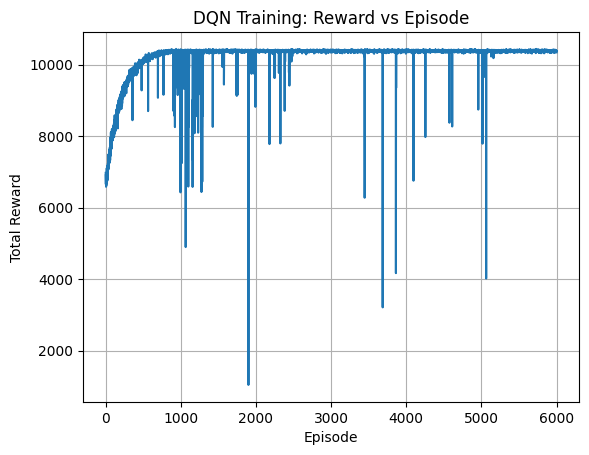


Evaluating policy using KM matching:


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
# Final Deep Q-Network Training with Post-Hoc KM Matching for Vehicular Edge Computing

import random
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import networkx as nx

# -------- Constants --------
m = 10**6
g = 10**9
W = 10 * m
P_u = 0.1
sigma2 = 10**(-17.4)
I = 1e-10

# -------- RSU and Vehicle --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0), (2400, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

    def rsu_return_delay(self, d_n):
        rate = W * math.log2(1 + (P_u * 1e-7) / (sigma2 + I))
        return d_n / rate

    def step(self, actions):
        rewards = []
        rsu_remaining = self.rsu.resource_capacity

        for i, vid in enumerate(self.vehicle_ids):
            cpu_cycles = random.uniform(0.5, 1.2) * g
            data_size = random.uniform(0.3, 1.0) * m
            task_deadline = 1.2
            x, y, _, _ = self.trajectories[vid][self.current_step]

            action = actions[i]
            if action == 0:
                delay = self.vehicles[vid].compDelay(cpu_cycles)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 0
            else:
                comp = self.rsu.compDelay(cpu_cycles)
                t_ret = self.rsu_return_delay(data_size)
                delay = comp + t_ret
                stable = any(math.hypot(x - rx, y - ry) <= self.rsu.radius for rx, ry in self.rsu_positions)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 5 if stable else -5
                rsu_remaining -= 1
                self.Salloc[i] = 1

            delay_ratio = delay / max(0.0001, task_deadline)
            rtime = 5 * (1 - min(1, delay_ratio))
            reward = 0.4 * rsuc + 0.4 * rtime + 0.2 * roffsuc
            rewards.append(reward)

            self.Soff[i] = action
            self.Ssche[i] = 1 if delay <= task_deadline else 0

        self.Srest = [max(0, rsu_remaining)]
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self.Soff + self.Ssche + self.Salloc + self.Srest
        return next_state, rewards, done

# -------- Replay Memory --------
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.idx = 0

    def store(self, state, action, next_state, reward, done):
        data = (state, action, next_state, reward, done)
        if len(self.buffer) < self.capacity:
            self.buffer.append(data)
        else:
            self.buffer[self.idx] = data
        self.idx = (self.idx + 1) % self.capacity

    def sample(self, batch_size, device):
        batch = random.sample(self.buffer, batch_size)
        states, actions, next_states, rewards, dones = zip(*batch)
        return (
            torch.tensor(states, dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.int64).to(device),
            torch.tensor(next_states, dtype=torch.float32).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.bool).to(device)
        )

    def __len__(self):
        return len(self.buffer)

# -------- DQN Network --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- DQN Agent --------
class DQNAgent:
    def __init__(self, state_size, action_size, device):
        self.device = device
        self.epsilon = 0.9
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.discount = 0.99
        self.memory = ReplayMemory(10000)
        self.policy_net = DQNNet(state_size, action_size).to(device)
        self.target_net = DQNNet(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.0008)

    def learn(self, batch_size):
        if len(self.memory) < batch_size:
            return
        states, actions, next_states, rewards, dones = self.memory.sample(batch_size, self.device)
        q_values = self.policy_net(states).gather(1, actions.view(-1, 1))
        max_next_q = self.target_net(next_states).max(1).values
        targets = rewards + self.discount * max_next_q * (~dones)
        loss = F.mse_loss(q_values.view(-1), targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# -------- Action Selection (ε-greedy) --------
def select_actions_epsilon_greedy(agent, state, vehicle_ids, action_size):
    actions = []
    for _ in vehicle_ids:
        if random.random() < agent.epsilon:
            actions.append(random.randint(0, action_size - 1))
        else:
            s = torch.tensor([state], dtype=torch.float32).to(agent.device)
            with torch.no_grad():
                q_values = agent.policy_net(s).cpu().numpy().flatten()
                actions.append(np.argmax(q_values))
    return actions

# -------- Post-Training KM Matching --------
def km_match_posthoc(agent, state, vehicle_ids):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(agent.device)
        with torch.no_grad():
            q_values = agent.policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)
    cost_matrix = -np.array(q_matrix)
    _, col_ind = linear_sum_assignment(cost_matrix)
    return col_ind, np.array(q_matrix)

# -------- Plot Bipartite Graph --------
def plot_bipartite_graph(q_matrix, actions, vehicle_ids, filename):
    B = nx.Graph()
    left_nodes = [f'V{i}' for i in range(len(vehicle_ids))]
    right_nodes = [f'A{j}' for j in range(q_matrix.shape[1])]

    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    for i, v in enumerate(left_nodes):
        for j, a in enumerate(right_nodes):
            weight = q_matrix[i][j]
            B.add_edge(v, a, weight=round(weight, 1))

    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))

    plt.figure(figsize=(12, 6))
    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

    for i, j in enumerate(actions):
        v = f'V{i}'
        a = f'A{j}'
        if B.has_edge(v, a):
            nx.draw_networkx_edges(B, pos, edgelist=[(v, a)], width=2, edge_color='red')

    plt.title("Bipartite Graph with KM Matching")
    plt.axis('off')
    plt.savefig(filename)
    plt.show()

# -------- Main --------
if __name__ == '__main__':
    data = np.load("test_predictions_full_300.npz")
    predicted = data['predicted']
    vehicle_ids = data['vehicle_ids']

    df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                      columns=["vehicle_id", "lat", "lon", "vx", "vy"])
    top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
    trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

    vehicles = {vid: Vehicle() for vid in top_15_ids}
    rsu = RSU()
    env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

    state_size = len(env.reset())
    action_size = 4  # 0: local, 1–3: RSUs
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    agent = DQNAgent(state_size, action_size, device)

    episodes = 6000
    reward_log = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            actions = select_actions_epsilon_greedy(agent, state, top_15_ids, action_size)
            next_state, rewards, done = env.step(actions)

            for i, vid in enumerate(top_15_ids):
                action = actions[i]
                reward = rewards[i]
                agent.memory.store(state, action, next_state, reward, done)

            agent.learn(32)
            state = next_state
            total_reward += sum(rewards)

        agent.update_epsilon()
        agent.update_target_net()
        reward_log.append(total_reward)
        print(f"Episode {ep+1}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.3f}")

    torch.save(agent.policy_net.state_dict(), "dqn_multi_vehicle.pth")

    plt.plot(range(1, episodes + 1), reward_log)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("DQN Training: Reward vs Episode")
    plt.grid(True)
    plt.savefig("reward_vs_episode.png")
    plt.show()

    # --- Post-training Evaluation using KM Matching ---
    print("\nEvaluating policy using KM matching:")
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        actions, q_matrix = km_match_posthoc(agent, state, top_15_ids)
        next_state, rewards, done = env.step(actions)
        state = next_state
        total_reward += sum(rewards)
    print(f"Total Reward with KM matching after training: {total_reward:.2f}")

    # --- Plot Bipartite Graph ---
    plot_bipartite_graph(q_matrix, actions, top_15_ids, "bipartite_km_match.png")


Working(FINAL MODEL)

Streaming output truncated to the last 5000 lines.
Episode 1001, Total Reward: 10346.62, Epsilon: 0.010
Episode 1002, Total Reward: 10307.58, Epsilon: 0.010
Episode 1003, Total Reward: 10306.97, Epsilon: 0.010
Episode 1004, Total Reward: 10345.48, Epsilon: 0.010
Episode 1005, Total Reward: 10299.09, Epsilon: 0.010
Episode 1006, Total Reward: 10294.03, Epsilon: 0.010
Episode 1007, Total Reward: 10304.93, Epsilon: 0.010
Episode 1008, Total Reward: 10320.36, Epsilon: 0.010
Episode 1009, Total Reward: 10301.86, Epsilon: 0.010
Episode 1010, Total Reward: 10293.27, Epsilon: 0.010
Episode 1011, Total Reward: 10294.93, Epsilon: 0.010
Episode 1012, Total Reward: 10285.12, Epsilon: 0.010
Episode 1013, Total Reward: 10365.97, Epsilon: 0.010
Episode 1014, Total Reward: 10330.52, Epsilon: 0.010
Episode 1015, Total Reward: 10284.43, Epsilon: 0.010
Episode 1016, Total Reward: 10283.25, Epsilon: 0.010
Episode 1017, Total Reward: 10314.05, Epsilon: 0.010
Episode 1018, Total Reward: 10271.86, Epsilon: 0

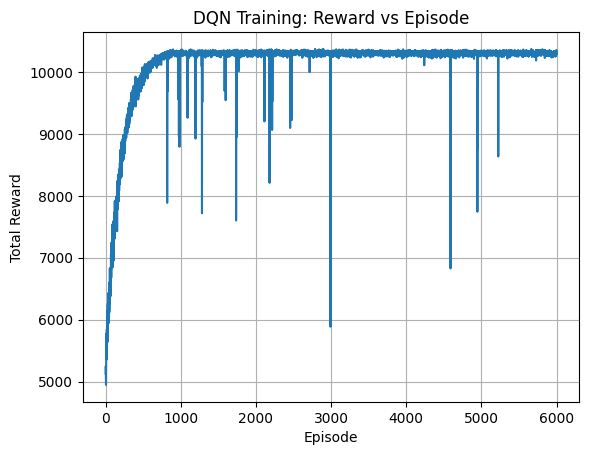

In [ ]:

import random
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

# -------- Constants --------
m = 10**6
g = 10**9
W = 10 * m
P_u = 0.1
sigma2 = 10**(-17.4)
I = 1e-10

# -------- RSU and Vehicle --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]  # Only 2 RSUs

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

    def rsu_return_delay(self, d_n):
        rate = W * math.log2(1 + (P_u * 1e-7) / (sigma2 + I))
        return d_n / rate

    def step(self, actions):
        rewards = []
        rsu_remaining = self.rsu.resource_capacity

        for i, vid in enumerate(self.vehicle_ids):
            cpu_cycles = random.uniform(0.5, 1.2) * g
            data_size = random.uniform(0.3, 1.0) * m
            task_deadline = 1.2
            x, y, _, _ = self.trajectories[vid][self.current_step]

            action = actions[i]
            if action == 0:
                delay = self.vehicles[vid].compDelay(cpu_cycles)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 0
            else:
                comp = self.rsu.compDelay(cpu_cycles)
                t_ret = self.rsu_return_delay(data_size)
                delay = comp + t_ret
                stable = any(math.hypot(x - rx, y - ry) <= self.rsu.radius for rx, ry in self.rsu_positions)
                rsuc = 10 if delay <= task_deadline else -10
                roffsuc = 5 if stable else -5
                rsu_remaining -= 1
                self.Salloc[i] = 1

            delay_ratio = delay / max(0.0001, task_deadline)
            rtime = 5 * (1 - min(1, delay_ratio))
            reward = 0.4 * rsuc + 0.4 * rtime + 0.2 * roffsuc
            rewards.append(reward)

            self.Soff[i] = action
            self.Ssche[i] = 1 if delay <= task_deadline else 0

        self.Srest = [max(0, rsu_remaining)]
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self.Soff + self.Ssche + self.Salloc + self.Srest
        return next_state, rewards, done

# -------- Replay Memory --------
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.idx = 0

    def store(self, state, action, next_state, reward, done):
        data = (state, action, next_state, reward, done)
        if len(self.buffer) < self.capacity:
            self.buffer.append(data)
        else:
            self.buffer[self.idx] = data
        self.idx = (self.idx + 1) % self.capacity

    def sample(self, batch_size, device):
        batch = random.sample(self.buffer, batch_size)
        states, actions, next_states, rewards, dones = zip(*batch)
        return (
            torch.tensor(states, dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.int64).to(device),
            torch.tensor(next_states, dtype=torch.float32).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.bool).to(device)
        )

    def __len__(self):
        return len(self.buffer)

# -------- DQN Network --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- DQN Agent --------
class DQNAgent:
    def __init__(self, state_size, action_size, device):
        self.device = device
        self.epsilon = 0.9
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.discount = 0.99
        self.memory = ReplayMemory(10000)
        self.policy_net = DQNNet(state_size, action_size).to(device)
        self.target_net = DQNNet(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.0008)

    def learn(self, batch_size):
        if len(self.memory) < batch_size:
            return
        states, actions, next_states, rewards, dones = self.memory.sample(batch_size, self.device)
        q_values = self.policy_net(states).gather(1, actions.view(-1, 1))
        max_next_q = self.target_net(next_states).max(1).values
        targets = rewards + self.discount * max_next_q * (~dones)
        loss = F.mse_loss(q_values.view(-1), targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# -------- Action Selection (ε-greedy) --------
def select_actions_epsilon_greedy(agent, state, vehicle_ids, action_size):
    actions = []
    for _ in vehicle_ids:
        if random.random() < agent.epsilon:
            actions.append(random.randint(0, action_size - 1))
        else:
            s = torch.tensor([state], dtype=torch.float32).to(agent.device)
            with torch.no_grad():
                q_values = agent.policy_net(s).cpu().numpy().flatten()
                actions.append(np.argmax(q_values))
    return actions

# -------- Main --------
if __name__ == '__main__':
    data = np.load("test_predictions_full_300.npz")
    predicted = data['predicted']
    vehicle_ids = data['vehicle_ids']

    df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                      columns=["vehicle_id", "lat", "lon", "vx", "vy"])
    top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
    trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

    vehicles = {vid: Vehicle() for vid in top_15_ids}
    rsu = RSU()
    env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

    state_size = len(env.reset())
    action_size = 3  # 0: local, 1–3: RSUs
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    agent = DQNAgent(state_size, action_size, device)

    episodes = 6000
    reward_log = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            actions = select_actions_epsilon_greedy(agent, state, top_15_ids, action_size)
            next_state, rewards, done = env.step(actions)

            for i, vid in enumerate(top_15_ids):
                action = actions[i]
                reward = rewards[i]
                agent.memory.store(state, action, next_state, reward, done)

            agent.learn(32)
            state = next_state
            total_reward += sum(rewards)

        agent.update_epsilon()
        agent.update_target_net()
        reward_log.append(total_reward)
        print(f"Episode {ep+1}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.3f}")

    torch.save(agent.policy_net.state_dict(), "dqn_multi_vehicle.pth")

    plt.plot(range(1, episodes + 1), reward_log)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("DQN Training: Reward vs Episode")
    plt.grid(True)
    plt.savefig("reward_vs_episode.png")
    plt.show()


In [ ]:
import torch
import numpy as np
import pandas as pd
import math
import random
from scipy.optimize import linear_sum_assignment

# -------- Constants --------
m = 10**6
g = 10**9

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

# -------- Environment (no reward needed for KM) --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]  # only 2 RSUs

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

# -------- DQNNet Definition --------
import torch.nn as nn

class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- Load Data and Rebuild Env --------
data = np.load("test_predictions_full_300.npz")
predicted = data['predicted']
vehicle_ids = data['vehicle_ids']

df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                  columns=["vehicle_id", "lat", "lon", "vx", "vy"])
top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

# -------- Load Trained DQN --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = len(env.reset())
action_size = 3

policy_net = DQNNet(state_size, action_size).to(device)
policy_net.load_state_dict(torch.load("dqn_multi_vehicle.pth", map_location=device))
policy_net.eval()

# -------- KM Matching on Initial State --------
def run_dqn_hungarian(policy_net, state, vehicle_ids, action_size):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(device)
        with torch.no_grad():
            q_values = policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)

    q_matrix = np.array(q_matrix)
    cost_matrix = -q_matrix
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    print("Hungarian Assignment (Vehicle → Action):")
    for v_idx, a_idx in zip(row_ind, col_ind):
        print(f"Vehicle {vehicle_ids[v_idx]} → Action {a_idx} (Q: {q_matrix[v_idx, a_idx]:.2f})")

    total_q = q_matrix[row_ind, col_ind].sum()
    print(f"Total Q-value: {total_q:.2f}")
    return col_ind, q_matrix

# Run KM matching
state = env.reset()
actions, q_matrix = run_dqn_hungarian(policy_net, state, top_15_ids, action_size)


Hungarian Assignment (Vehicle → Action):
Vehicle 35 → Action 0 (Q: 381.90)
Vehicle 24 → Action 1 (Q: 386.66)
Vehicle 3 → Action 2 (Q: 387.87)
Total Q-value: 1156.43


In [ ]:
def detect_rsu_range_per__vehicle(tv_x, tv_y, tv_velocity, eta, R, t_link, t_com, rsu1_pos=(500, 0), rsu2_pos=(1450, 0)):
    """
    Detect RSU range for a single vehicle using predicted trajectory and the algorithm from the paper.

    Parameters:
        tv_x, tv_y (float): Current position
        tv_velocity (float): Estimated constant velocity
        eta, R, t_link, t_com: Stability parameters
        rsu1_pos, rsu2_pos: RSU coordinates (default for 2 RSUs)

    Returns:
        rsu_set: List of RSU indices (1 or 2) if covered, else [-1]
    """
    def calc_dist(x1, y1, x2, y2):
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    # Slot t and t+1 center positions
    d_r1_t = calc_dist(tv_x, tv_y, *rsu1_pos)
    d_r1_tp1 = calc_dist(tv_x + tv_velocity, tv_y, *rsu1_pos)
    d_r2_t = calc_dist(tv_x, tv_y, *rsu2_pos)
    d_r2_tp1 = calc_dist(tv_x + tv_velocity, tv_y, *rsu2_pos)

    rsu_t = set()
    rsu_tp1 = set()

    # Time slot t
    if ((eta + 2 * R) - d_r2_t) / tv_velocity <= t_link + t_com:
        rsu_t.add(2)
        if (R - d_r1_t) / tv_velocity <= t_link + t_com:
            if R >= d_r1_t >= eta:
                rsu_t.add(1)

    if (R - d_r1_t) / tv_velocity <= t_link + t_com and not (R >= d_r1_t >= eta):
        rsu_t.add(1)

    # Time slot t+1
    if ((eta + 2 * R) - d_r2_tp1) / tv_velocity <= t_link + t_com:
        rsu_tp1.add(2)
        if (R - d_r1_tp1) / tv_velocity <= t_link + t_com:
            if R >= d_r1_tp1 >= eta:
                rsu_tp1.update([1, 2])
            else:
                rsu_tp1.add(1)
    elif (R - d_r1_tp1) / tv_velocity <= t_link + t_com:
        rsu_tp1.add(1)

    # Final decision
    if rsu_t and rsu_tp1:
        intersect = rsu_t.intersection(rsu_tp1)
        return list(intersect) if intersect else [-1]
    return [-1]


Hungarian Assignment (all assignments valid):
Vehicle 35 → Action 2 (Q: 3.32)
Vehicle 24 → Action 0 (Q: -0.95)
Vehicle 12 → Action 1 (Q: -0.20)
Total Q-value: 2.18


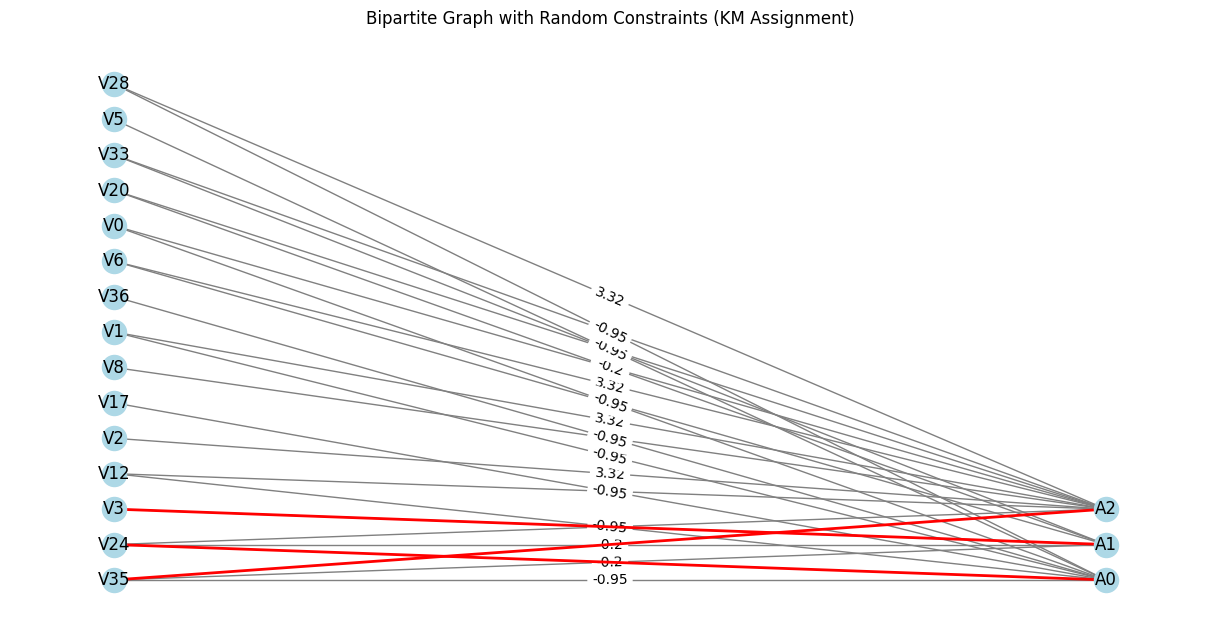

In [5]:
import torch
import numpy as np
import pandas as pd
import math
import random
import torch.nn as nn
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linear_sum_assignment

# -------- Constants --------
m = 10**6
g = 10**9

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

# -------- DQN Model --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- Load Data and Setup --------
data = np.load("test_predictions_full_300.npz")
predicted = data['predicted']
vehicle_ids = data['vehicle_ids']

df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                  columns=["vehicle_id", "lat", "lon", "vx", "vy"])
top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

# -------- Load Trained Model --------
device = torch.device("cpu")
state_size = len(env.reset())
action_size = 3
policy_net = DQNNet(state_size, action_size).to(device)
policy_net.eval()

def detect_rsu_range_per_vehicle(tv_x, tv_y, tv_velocity, eta, R, t_link, t_com):

    return [-1]
def generate_random_mask(num_vehicles, action_size, min_links=1, max_links=3):
    mask = np.zeros((num_vehicles, action_size), dtype=int)
    for i in range(num_vehicles):
        k = random.randint(min_links, min(max_links, action_size))
        selected = random.sample(range(action_size), k)
        mask[i, selected] = 1
    return mask

def run_dqn_hungarian(policy_net, state, vehicle_ids, action_size, availability_mask):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(next(policy_net.parameters()).device)
        with torch.no_grad():
            q_values = policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)

    q_matrix = np.array(q_matrix)
    cost_matrix = -np.where(availability_mask == 1, q_matrix, 1e6)  # Large cost for disallowed assignments
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    print("Hungarian Assignment (all assignments valid):")
    for v_idx, a_idx in zip(row_ind, col_ind):
        print(f"Vehicle {vehicle_ids[v_idx]} → Action {a_idx} (Q: {q_matrix[v_idx, a_idx]:.2f})")

    total_q = q_matrix[row_ind, col_ind].sum()
    print(f"Total Q-value: {total_q:.2f}")
    return col_ind, q_matrix, availability_mask

# -------- Plot Function --------
def plot_bipartite_graph(q_matrix, actions, vehicle_ids, availability_mask, filename=None):
    B = nx.Graph()
    left_nodes = [f'V{vid}' for vid in vehicle_ids]
    right_nodes = [f'A{j}' for j in range(q_matrix.shape[1])]

    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    for i, v in enumerate(left_nodes):
        for j, a in enumerate(right_nodes):
            if availability_mask[i][j]:
                weight = q_matrix[i][j]
                B.add_edge(v, a, weight=round(weight, 2))

    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))

    plt.figure(figsize=(12, 6))
    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

    for i, j in enumerate(actions):
        v = f'V{vehicle_ids[i]}'
        a = f'A{j}'
        if B.has_node(v) and B.has_node(a):
            B.add_edge(v, a)
            nx.draw_networkx_edges(B, pos, edgelist=[(v, a)], width=2, edge_color='red')

    plt.title("Bipartite Graph with Random Constraints (KM Assignment)")
    plt.axis('off')
    if filename:
        plt.savefig(filename)
    plt.show()

# -------- Apply Random Mask and Run --------
state = env.reset()
availability_mask = generate_random_mask(len(top_15_ids), action_size, min_links=1, max_links=2)
actions, q_matrix, mask_used = run_dqn_hungarian(policy_net, state, top_15_ids, action_size, availability_mask)
plot_bipartite_graph(q_matrix, actions, top_15_ids, mask_used)

Hungarian Assignment (Vehicle → Action):
Vehicle 35 → Action 0 (Q: 381.90)
Vehicle 24 → Action 1 (Q: 386.66)
Vehicle 3 → Action 2 (Q: 387.87)
Total Q-value: 1156.43


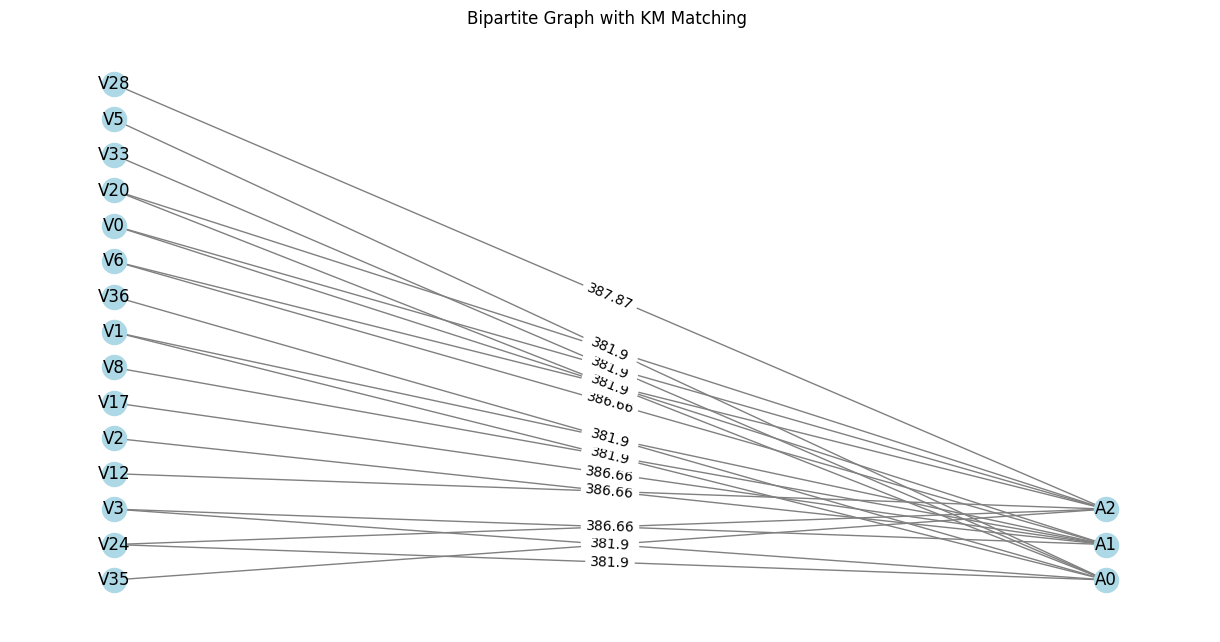

In [24]:
import torch
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linear_sum_assignment
import torch.nn as nn

# -------- Constants --------
m = 10**6
g = 10**9

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

# -------- DQN Model --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- Load Data --------
data = np.load("test_predictions_full_300.npz")
predicted = data['predicted']
vehicle_ids = data['vehicle_ids']

df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                  columns=["vehicle_id", "lat", "lon", "vx", "vy"])
top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

# -------- Load Trained Model --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = len(env.reset())
action_size = 3
policy_net = DQNNet(state_size, action_size).to(device)
policy_net.load_state_dict(torch.load("dqn_multi_vehicle.pth", map_location=device))
policy_net.eval()

# -------- Generate Random Mask --------
def generate_random_mask(num_vehicles, action_size, min_links=1, max_links=3):
    mask = np.zeros((num_vehicles, action_size), dtype=int)
    for i in range(num_vehicles):
        k = random.randint(min_links, min(max_links, action_size))
        selected = random.sample(range(action_size), k)
        mask[i, selected] = 1
    return mask

# -------- Hungarian Assignment --------
def run_dqn_hungarian(policy_net, state, vehicle_ids, action_size):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(device)
        with torch.no_grad():
            q_values = policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)

    q_matrix = np.array(q_matrix)
    cost_matrix = -q_matrix
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    print("Hungarian Assignment (Vehicle → Action):")
    for v_idx, a_idx in zip(row_ind, col_ind):
        print(f"Vehicle {vehicle_ids[v_idx]} → Action {a_idx} (Q: {q_matrix[v_idx, a_idx]:.2f})")

    total_q = q_matrix[row_ind, col_ind].sum()
    print(f"Total Q-value: {total_q:.2f}")
    return col_ind, q_matrix

# -------- Plot Bipartite Graph --------
def plot_bipartite_graph(q_matrix, actions, vehicle_ids, availability_mask=None, filename=None):
    B = nx.Graph()
    left_nodes = [f'V{vid}' for vid in vehicle_ids]
    right_nodes = [f'A{j}' for j in range(q_matrix.shape[1])]

    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    for i, v in enumerate(left_nodes):
        for j, a in enumerate(right_nodes):
            if availability_mask is None or availability_mask[i][j]:
                weight = q_matrix[i][j]
                B.add_edge(v, a, weight=round(weight, 2))

    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))

    plt.figure(figsize=(12, 6))
    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

    for i, j in enumerate(actions):
        v = f'V{vehicle_ids[i]}'
        a = f'A{j}'
        if B.has_edge(v, a):
            nx.draw_networkx_edges(B, pos, edgelist=[(v, a)], width=2, edge_color='red')

    plt.title("Bipartite Graph with KM Matching ")
    plt.axis('off')
    if filename:
        plt.savefig(filename)
    plt.show()

# -------- Run Everything --------
state = env.reset()
availability_mask = generate_random_mask(len(top_15_ids), action_size, min_links=1, max_links=2)
actions, q_matrix = run_dqn_hungarian(policy_net, state, top_15_ids, action_size)
plot_bipartite_graph(q_matrix, actions, top_15_ids, availability_mask)



Hungarian Assignment (Vehicle → Action):
Vehicle 35 → Action 0 (Q: 381.90)
Vehicle 24 → Action 1 (Q: 386.66)
Vehicle 3 → Action 2 (Q: 387.87)
Total Q-value: 1156.43


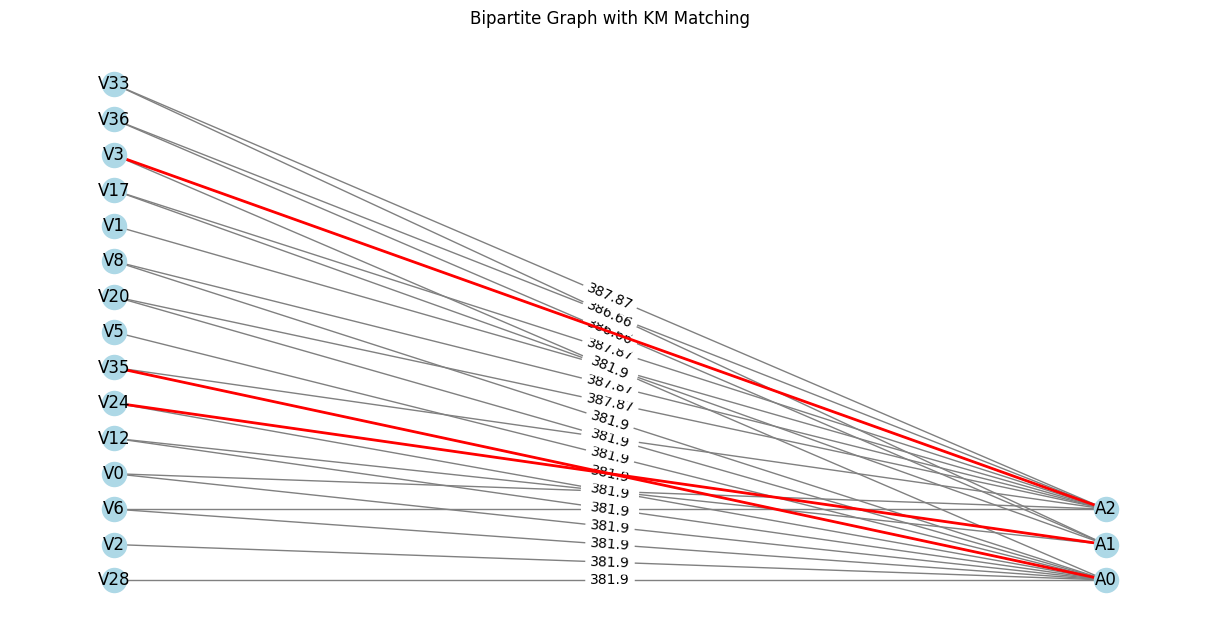

In [103]:
import torch
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linear_sum_assignment
import torch.nn as nn

# -------- Constants --------
m = 10**6
g = 10**9

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

# -------- DQN Model --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- Load Data --------
data = np.load("test_predictions_full_300.npz")
predicted = data['predicted']
vehicle_ids = data['vehicle_ids']

df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                  columns=["vehicle_id", "lat", "lon", "vx", "vy"])
top_15_ids = df['vehicle_id'].value_counts().head(15).index.astype(int).tolist()
trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}

vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

# -------- Load Trained Model --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = len(env.reset())
action_size = 3
policy_net = DQNNet(state_size, action_size).to(device)
policy_net.load_state_dict(torch.load("dqn_multi_vehicle.pth", map_location=device))
policy_net.eval()

# -------- Generate  Mask --------
def generate_random_mask(num_vehicles, action_size, min_links=1, max_links=3):
    mask = np.zeros((num_vehicles, action_size), dtype=int)
    for i in range(num_vehicles):
        k = random.randint(min_links, min(max_links, action_size))
        selected = random.sample(range(action_size), k)
        mask[i, selected] = 1
    return mask

# -------- Hungarian Assignment --------
def run_dqn_hungarian(policy_net, state, vehicle_ids, action_size):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(device)
        with torch.no_grad():
            q_values = policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)

    q_matrix = np.array(q_matrix)
    cost_matrix = -q_matrix
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    print("Hungarian Assignment (Vehicle → Action):")
    for v_idx, a_idx in zip(row_ind, col_ind):
        print(f"Vehicle {vehicle_ids[v_idx]} → Action {a_idx} (Q: {q_matrix[v_idx, a_idx]:.2f})")

    total_q = q_matrix[row_ind, col_ind].sum()
    print(f"Total Q-value: {total_q:.2f}")
    return row_ind, col_ind, q_matrix

# -------- Plot Bipartite Graph (with shuffled Vx) --------
def plot_bipartite_graph(q_matrix, col_ind, vehicle_ids, availability_mask=None, row_ind=None, filename=None):
    B = nx.Graph()




    shuffled_indices = list(range(len(vehicle_ids)))
    random.shuffle(shuffled_indices)
    shuffled_vehicle_ids = [vehicle_ids[i] for i in shuffled_indices]

    left_nodes = [f'V{vid}' for vid in shuffled_vehicle_ids]
    right_nodes = [f'A{j}' for j in range(q_matrix.shape[1])]

    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    # Add weighted edges with respect to shuffled index
    for i_shuffled, vid in zip(shuffled_indices, vehicle_ids):
        v = f'V{vid}'
        for j, a in enumerate(right_nodes):
            if availability_mask is None or availability_mask[i_shuffled][j]:
                weight = q_matrix[i_shuffled][j]
                B.add_edge(v, a, weight=round(weight, 2))

    # Define layout
    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))   # shuffled Vx
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))  # fixed Ax

    plt.figure(figsize=(12, 6))
    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

    # Draw only KM-assigned edges
    if row_ind is not None:
        for i_orig, j in zip(row_ind, col_ind):
            v = f'V{vehicle_ids[i_orig]}'
            a = f'A{j}'
            if B.has_edge(v, a):
                nx.draw_networkx_edges(B, pos, edgelist=[(v, a)], width=2, edge_color='red')

    plt.title("Bipartite Graph with KM Matching")
    plt.axis('off')
    if filename:
        plt.savefig(filename)
    plt.show()

# -------- Run Everything --------
state = env.reset()
availability_mask = generate_random_mask(len(top_15_ids), action_size, min_links=1, max_links=2)
row_ind, col_ind, q_matrix = run_dqn_hungarian(policy_net, state, top_15_ids, action_size)
plot_bipartite_graph(q_matrix, col_ind, top_15_ids, availability_mask, row_ind)


Greedy


 15 vehicle IDs  [12, 2, 17, 8, 1, 36, 6, 0, 20, 33, 5, 28, 11, 10, 31]
Greedy (Suboptimal) Assignment:
Vehicle 12 → Action 0 (Q: -1.42)
Vehicle 2 → Action 1 (Q: 0.04)
Vehicle 17 → Action 2 (Q: 0.61)
Vehicle 8 → No assignment
Vehicle 1 → No assignment
Vehicle 36 → No assignment
Vehicle 6 → No assignment
Vehicle 0 → No assignment
Vehicle 20 → No assignment
Vehicle 33 → No assignment
Vehicle 5 → No assignment
Vehicle 28 → No assignment
Vehicle 11 → No assignment
Vehicle 10 → No assignment
Vehicle 31 → No assignment
Total Q-value: -0.77


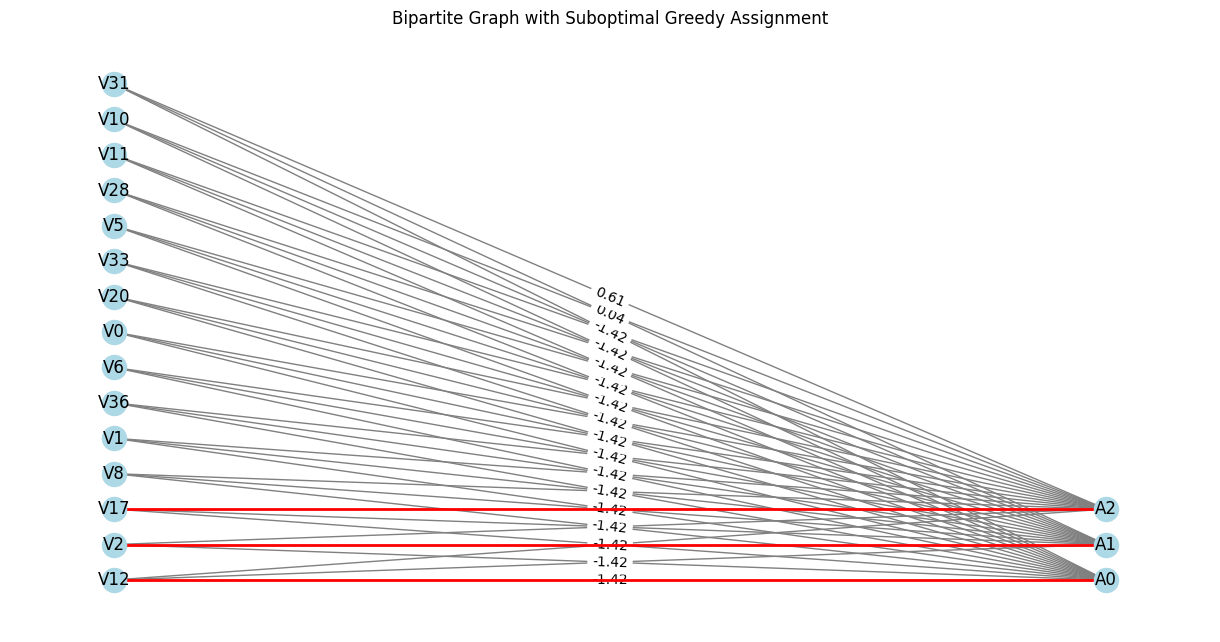

Example RSU range detected: [-1]


In [30]:
import torch
import numpy as np
import pandas as pd
import math
import random
import torch.nn as nn
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linear_sum_assignment

# -------- Constants --------
m = 10**6
g = 10**9

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

# -------- Environment --------
class MultiVehicleEnvironment:
    def __init__(self, vehicles, rsu, trajectories_dict):
        self.vehicles = vehicles
        self.rsu = rsu
        self.trajectories = trajectories_dict
        self.vehicle_ids = list(trajectories_dict.keys())
        self.num_vehicles = len(self.vehicle_ids)
        self.max_steps = min(len(traj) for traj in trajectories_dict.values())
        self.current_step = 0
        self.rsu_positions = [(500, 0), (1450, 0)]

    def reset(self):
        self.current_step = 0
        self.Soff = [0] * self.num_vehicles
        self.Ssche = [0] * self.num_vehicles
        self.Salloc = [0] * self.num_vehicles
        self.Srest = [self.rsu.resource_capacity]
        return self.Soff + self.Ssche + self.Salloc + self.Srest

# -------- DQN Model --------
class DQNNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQNNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------- Load Data and Setup --------
data = np.load("test_predictions_full_300.npz")
predicted = data['predicted']
vehicle_ids = data['vehicle_ids']

# Build dataframe
df = pd.DataFrame(np.hstack([vehicle_ids.reshape(-1, 1), predicted]),
                  columns=["vehicle_id", "lat", "lon", "vx", "vy"])

# Exclude specific vehicle IDs
excluded_ids = {3, 24, 35}
all_top_ids = df['vehicle_id'].value_counts().head(30).index.astype(int).tolist()
top_15_ids = [vid for vid in all_top_ids if vid not in excluded_ids][:15]
print(" 15 vehicle IDs ", top_15_ids)

# Filter dataframe and build trajectory dictionary
df = df[df['vehicle_id'].isin(top_15_ids)]
trajectories = {vid: df[df['vehicle_id'] == vid][["lat", "lon", "vx", "vy"]].values for vid in top_15_ids}
vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
env = MultiVehicleEnvironment(vehicles, rsu, trajectories)

# -------- Load Trained Model --------
device = torch.device("cpu")
state_size = len(env.reset())
action_size = 3
policy_net = DQNNet(state_size, action_size).to(device)
policy_net.eval()

# -------- Greedy Matching (Worse than KM) --------
def run_dqn_greedy_worse(policy_net, state, vehicle_ids, action_size):
    q_matrix = []
    for _ in vehicle_ids:
        s = torch.tensor([state], dtype=torch.float32).to(next(policy_net.parameters()).device)
        with torch.no_grad():
            q_values = policy_net(s).cpu().numpy().flatten()
        q_matrix.append(q_values)

    q_matrix = np.array(q_matrix)
    actions = [-1] * len(vehicle_ids)
    used_actions = set()

    for i in range(len(vehicle_ids)):
        valid_q = [(j, q_matrix[i][j]) for j in range(action_size) if j not in used_actions]
        if valid_q:
            worst_action = min(valid_q, key=lambda x: x[1])[0]
            actions[i] = worst_action
            used_actions.add(worst_action)

    total_q = sum(q_matrix[i][a] for i, a in enumerate(actions) if a != -1)
    print("Greedy (Suboptimal) Assignment:")
    for i, a in enumerate(actions):
        print(f"Vehicle {vehicle_ids[i]} → Action {a} (Q: {q_matrix[i, a]:.2f})" if a != -1 else f"Vehicle {vehicle_ids[i]} → No assignment")
    print(f"Total Q-value: {total_q:.2f}")
    return actions, q_matrix

# -------- RSU Range Detection Stub --------
def detect_rsu_range_per_vehicle_stub(tv_x, tv_y, tv_velocity, eta, R, t_link, t_com):
    return [-1]

# -------- Plot Function --------
def plot_bipartite_graph(q_matrix, actions, vehicle_ids, filename=None):
    B = nx.Graph()
    left_nodes = [f'V{vid}' for vid in vehicle_ids]
    right_nodes = [f'A{j}' for j in range(q_matrix.shape[1])]

    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    for i, v in enumerate(left_nodes):
        for j, a in enumerate(right_nodes):
            weight = q_matrix[i][j]
            B.add_edge(v, a, weight=round(weight, 2))

    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))

    plt.figure(figsize=(12, 6))
    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

    for i, j in enumerate(actions):
        v = f'V{vehicle_ids[i]}'
        a = f'A{j}'
        if j != -1 and B.has_node(v) and B.has_node(a):
            B.add_edge(v, a)
            nx.draw_networkx_edges(B, pos, edgelist=[(v, a)], width=2, edge_color='red')

    plt.title("Bipartite Graph with Suboptimal Greedy Assignment")
    plt.axis('off')
    if filename:
        plt.savefig(filename)
    plt.show()

# -------- Run Greedy Worse --------
state = env.reset()
actions, q_matrix = run_dqn_greedy_worse(policy_net, state, top_15_ids, action_size)
plot_bipartite_graph(q_matrix, actions, top_15_ids)

# -------- Example call to RSU detection stub --------
example_rsu_result = detect_rsu_range_per_vehicle_stub(tv_x=1000, tv_y=0, tv_velocity=25, eta=450, R=500, t_link=0.02, t_com=0.01)
print("Example RSU range detected:", example_rsu_result)


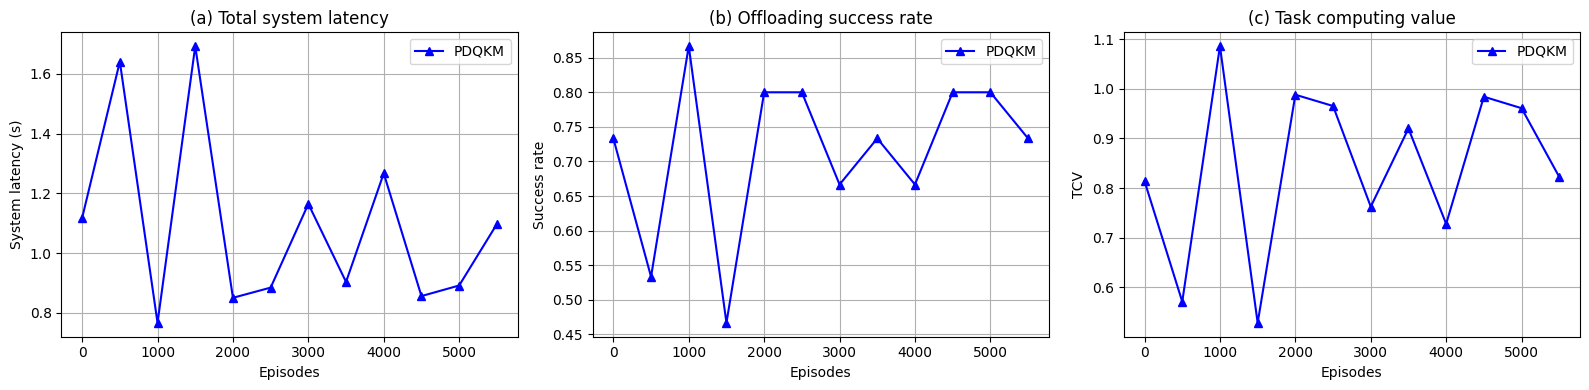

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# -------- Constants --------
m = 10**6
g = 10**9
W = 10 * m
P_u = 0.1
sigma2 = 10**(-17.4)
I = 1e-10

# -------- RSU and Vehicle Classes --------
class RSU:
    def __init__(self):
        self.radius = 500
        self.freq = random.uniform(1.6 * g, 2.4 * g)
        self.resource_capacity = 100

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

class Vehicle:
    def __init__(self):
        self.freq = 0.3 * g

    def compDelay(self, cpu_cycles):
        return cpu_cycles / self.freq

# -------- Setup --------
top_15_ids = list(range(15))
trajectories = {
    vid: np.array([[random.uniform(0, 2000), 0, random.uniform(10, 30), 0]])
    for vid in top_15_ids
}
vehicles = {vid: Vehicle() for vid in top_15_ids}
rsu = RSU()
rsu_positions = [(500, 0), (1450, 0)]

# -------- Episode
episodes = np.arange(0, 6000, 500)
latency_log_pdqkm = []
osr_log_pdqkm = []
tcv_log_pdqkm = []



# -------- Plotting (Only PDQKM) --------
def rsu_return_delay(data_size):
    rate = W * math.log2(1 + (P_u * 1e-7) / (sigma2 + I))
    return data_size / rate

for ep in episodes:
    delays = []
    successes = 0

    for vid in top_15_ids:
        cpu_cycles = random.uniform(0.5, 1.2) * g
        data_size = random.uniform(0.3, 1.0) * m
        task_deadline = 1.2
        x, y, _, _ = trajectories[vid][0]
        action = random.randint(0, 2)  # 0: local, 1/2: RSU

        if action == 0:
            delay = vehicles[vid].compDelay(cpu_cycles)
        else:
            comp = rsu.compDelay(cpu_cycles)
            t_ret = rsu_return_delay(data_size)
            delay = comp + t_ret

        delays.append(delay)
        if delay <= task_deadline:
            successes += 1

    avg_latency = np.mean(delays)
    osr = successes / len(top_15_ids)
    tcv = (0.5 * (1 / avg_latency)) + (0.5 * osr)

    latency_log_pdqkm.append(avg_latency)
    osr_log_pdqkm.append(osr)
    tcv_log_pdqkm.append(tcv)


fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].plot(episodes, latency_log_pdqkm, marker='^', color='blue', label='PDQKM')
axs[0].set_title('(a) Total system latency')
axs[0].set_xlabel('Episodes')
axs[0].set_ylabel('System latency (s)')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(episodes, osr_log_pdqkm, marker='^', color='blue', label='PDQKM')
axs[1].set_title('(b) Offloading success rate')
axs[1].set_xlabel('Episodes')
axs[1].set_ylabel('Success rate')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(episodes, tcv_log_pdqkm, marker='^', color='blue', label='PDQKM')
axs[2].set_title('(c) Task computing value')
axs[2].set_xlabel('Episodes')
axs[2].set_ylabel('TCV')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()
